<a href="https://colab.research.google.com/github/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/blob/main/Modulo_04_Estadistica/EjercicioN39.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>


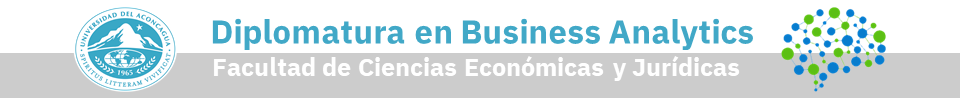

<center/>


# Diplomatura en **Business Analytics** - FCEJ/UdA - **Serie de tiempo**

***Serie no estacional/Modelo SARIMA***

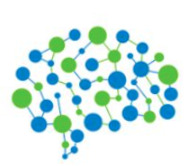





**Ejercicio Nº39** El gerente de una pyme de ventas de agroquímicos quiere evaluar la efectividad de una nueva estrategia de ventas aplicada hace 5 años atrás. En base a los modelos de serie de tiempo, describa cómo ha sido el comportamiento de las ventas y haga una proyección para los próximos 5 años. La serie parte del 2015 al 2020 y está medido en miles de dólares, cada tres meses. Recuerde trabajar en logaritmo. 

Instalar librería

In [ ]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




Cargar librería

In [ ]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Cargar datos

In [ ]:
ventas=c(125,153,106,88,118,161,133,102,138,144,113,80,109,137,125,109,130,165,128,96)

Transformar datos a ts

In [ ]:
datos.ts = ts(ventas, start = c(2015,1), frequency = 4)

datos.ts

,Qtr1,Qtr2,Qtr3,Qtr4
2015,125,153,106,88
2016,118,161,133,102
2017,138,144,113,80
2018,109,137,125,109
2019,130,165,128,96


Gráficar

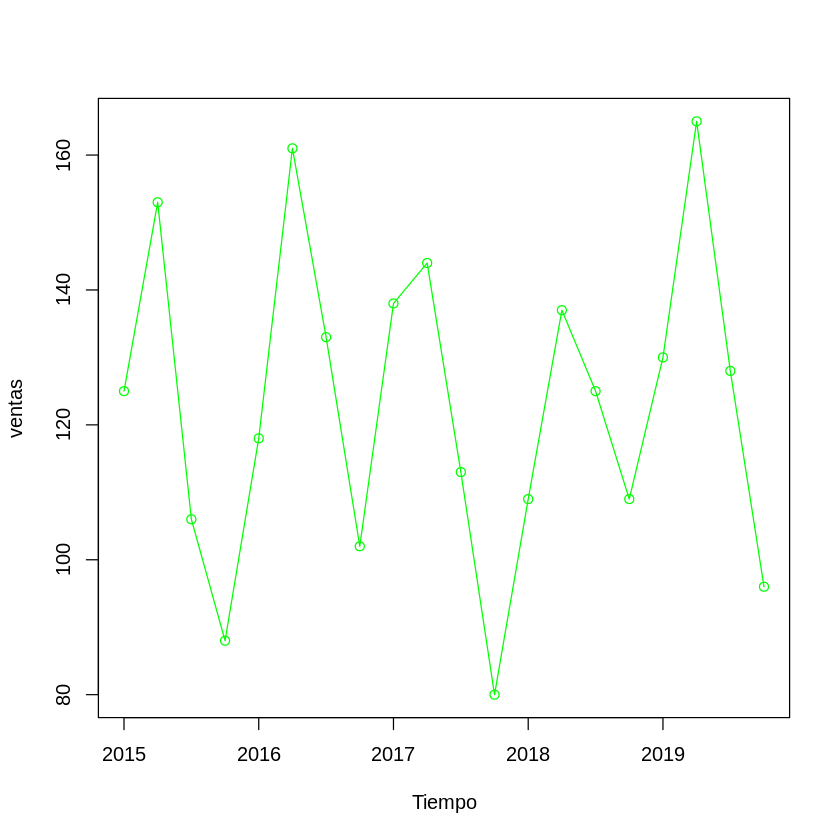

In [ ]:
plot(datos.ts, ylab="ventas", xlab="Tiempo" ,type="o",lwd=1,pch=1,cex=1,col="Green")

Transformar los datos en logaritmo 

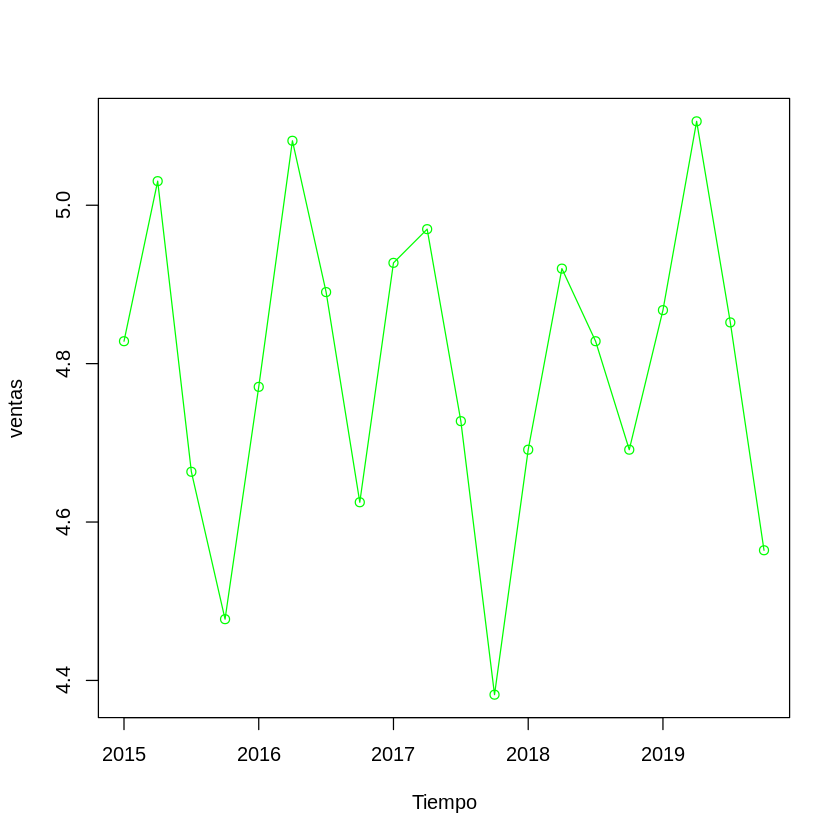

In [ ]:
datos.ts = log(datos.ts)
plot(datos.ts, ylab="ventas", xlab="Tiempo" ,type="o",lwd=1,pch=1,cex=1,col="Green")

Estimar el modelo SARIMA

In [ ]:
fit=auto.arima(datos.ts,seasonal = T,ic = c("aicc"), stepwise=T, allowdrift = T)
summary(fit)

Series: datos.ts 
ARIMA(1,0,0)(1,1,0)[4] 

Coefficients:
        ar1     sar1
      0.525  -0.6645
s.e.  0.221   0.1639

sigma^2 estimated as 0.009176:  log likelihood=14.62
AIC=-23.25   AICc=-21.25   BIC=-20.93

Training set error measures:
                     ME      RMSE       MAE       MPE     MAPE      MASE
Training set 0.01247008 0.0801465 0.0610304 0.2409666 1.268922 0.4127054
                    ACF1
Training set -0.07487383


Hacer la predicción para el próximo año

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2020 Q1       4.791696 4.668932 4.914460 4.603945 4.979448
2020 Q2       5.004026 4.865371 5.142681 4.791971 5.216081
2020 Q3       4.847637 4.704912 4.990361 4.629358 5.065915
2020 Q4       4.654702 4.510875 4.798528 4.434738 4.874665

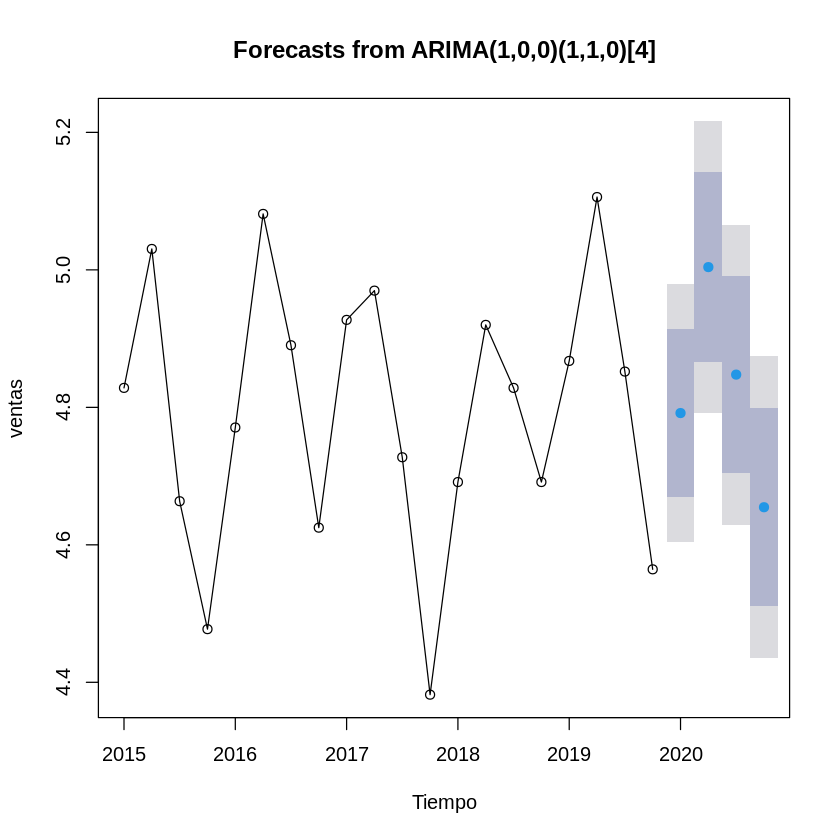

In [ ]:
plot(forecast(fit, h=4),ylab="ventas", xlab="Tiempo",type="o",lwd=1,pch=1,cex=1)
forecast(fit, h=4)

Invertir el logaritmo

In [ ]:
predic.log=forecast(fit, h=4)

exp(predic.log$mean)
exp(predic.log$lower)
exp(predic.log$upper)


,Qtr1,Qtr2,Qtr3,Qtr4
2020,120.5056,149.0119,127.4388,105.0779


,80%,95%
2020 Q1,106.58384,99.87751
2020 Q2,129.71902,120.53872
2020 Q3,110.48854,102.44826
2020 Q4,91.00145,84.33006


,80%,95%
2020 Q1,136.2458,145.3941
2020 Q2,171.1741,184.2108
2020 Q3,146.9895,158.5255
2020 Q4,121.3317,130.9303
